In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import datasets,layers,models

In [3]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [4]:
print(f'train images : {train_images.shape}')
print(f'test images : {test_images.shape}')
print(f'train labels : {train_labels.shape}')
print(f'test labels : {test_labels.shape}')

train images : (50000, 32, 32, 3)
test images : (10000, 32, 32, 3)
train labels : (50000, 1)
test labels : (10000, 1)


In [5]:
x= np.array([
[0,0,0,0,0,0,0,0,0],
[0,0,1,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,1,0,0,0,1,0,0],
[0,0,0,1,1,1,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
])

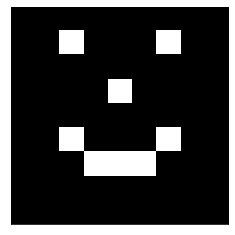

In [6]:
plt.imshow(x,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
train_images[1].shape

(32, 32, 3)

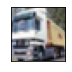

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(train_images[1])
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
train_labels[-1][-1]

1

In [10]:
def get_name(idx):
    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    return class_names[idx]

In [11]:
get_name(train_labels[-1][0])

'automobile'

In [12]:
def  image_graph():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i])
        plt.xlabel(get_name(train_labels[i][0]))
    plt.show()

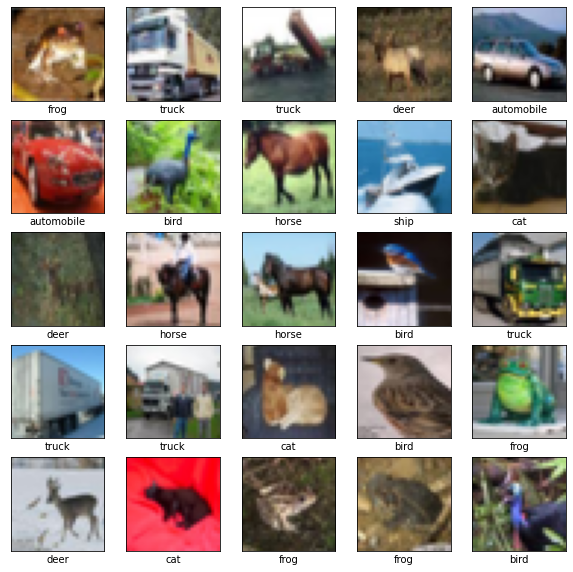

In [13]:
image_graph()

## CNN

In [14]:

model = models.Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
            )
train_logs='cnn_logs'
tb_callback=tf.keras.callbacks.TensorBoard(train_logs,histogram_freq=1)
model.fit(train_images,
          train_labels,
          epochs=20,
          validation_data=(test_images,test_labels),
          callbacks=[tb_callback])

Epoch 1/20
1563/1563 [==============================] - 116s 72ms/step - loss: 4.3645 - accuracy: 0.2122 - val_loss: 1.7616 - val_accuracy: 0.3626
Epoch 2/20
1563/1563 [==============================] - 123s 79ms/step - loss: 1.6653 - accuracy: 0.3918 - val_loss: 1.5656 - val_accuracy: 0.4276
Epoch 3/20
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4897 - accuracy: 0.4669 - val_loss: 1.4249 - val_accuracy: 0.4920
Epoch 4/20
1563/1563 [==============================] - 132s 85ms/step - loss: 1.3693 - accuracy: 0.5140 - val_loss: 1.4147 - val_accuracy: 0.5011
Epoch 5/20
1563/1563 [==============================] - 104s 66ms/step - loss: 1.3019 - accuracy: 0.5426 - val_loss: 1.3855 - val_accuracy: 0.5143
Epoch 6/20
1563/1563 [==============================] - 119s 76ms/step - loss: 1.2142 - accuracy: 0.5737 - val_loss: 1.3048 - val_accuracy: 0.5482
Epoch 7/20
1563/1563 [==============================] - 125s 80ms/step - loss: 1.1537 - accuracy: 0.5968 - val_loss: 1

In [21]:
model.save('cifar_10_60_percent.h5')

## Predictions

In [23]:
model=tf.keras.models.load_model('cifar_10_60_percent.h5')

In [27]:
result=model.predict(np.array([test_images[1]]))
print(result)

[[45.930008 43.359688 34.36638  30.242023 19.736347 25.484907 23.360739
  33.716217 49.16963  42.970726]]


In [28]:
result.argmax()

8

In [29]:
get_name(result.argmax())

'ship'

In [39]:
def  image_graph(model,start=0):
    plt.figure(figsize=(10,10))
    for p,i in enumerate(range(start,start+25)):
        out=model.predict(np.array([test_images[i]]))
        pred_idx=out[0].argmax()
        orig=get_name(test_labels[i][0])
        plabel=get_name(pred_idx)
        plt.subplot(5,5,p+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i])
        plt.xlabel(f'{orig} & {plabel}')
    plt.show()

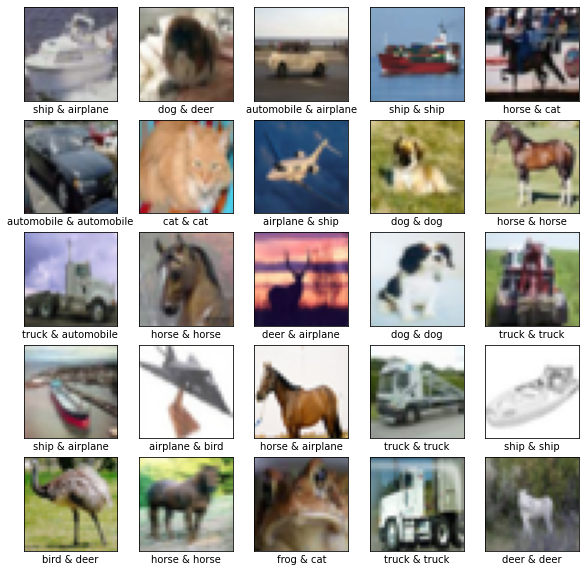

In [41]:
image_graph(model,199)